# Business Problem:
"How can we identify fraudulent credit card transactions in real time to minimize financial losses and improve customer trust?"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Load dataset
data = pd.read_csv("C:/Users/91938/Downloads/DataSets/creditcard.csv")

# Display first few rows of the dataset
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Checking for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
# Normalize data
scaler = StandardScaler()
data[['Amount']] = scaler.fit_transform(data[['Amount']])
data.drop(columns=['Time'], inplace=True)  # Drop 'Time' column as it's not necessary

In [5]:
# Separate fraud and normal transactions
normal_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] == 1]

In [6]:
# Drop the 'Class' column for training on normal transactions
X = normal_data.drop(columns=['Class']).values
y = normal_data['Class'].values

In [7]:
# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42) # training is 80%

In [8]:
input_dim = X_train.shape[1]

# Define the Autoencoder model
input_layer = Input(shape=(input_dim,))
encoder = Dense(14, activation="relu")(input_layer)

encoder = Dense(7, activation="relu")(encoder)
encoder = Dense(5, activation="relu")(encoder)
decoder = Dense(7, activation="relu")(encoder)

# decoder is recontructing back of what is reduced in the encoder
decoder = Dense(14, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 29)             │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,154 (4.51 KB)

 Trainable params: 1,154 (4.51 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test))

# batch size is nothing but the sample size which is 32

Epoch 1/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.9554 - val_loss: 0.8863
Epoch 2/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.8742 - val_loss: 0.8722
Epoch 3/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.8731 - val_loss: 0.8679
Epoch 4/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.8486 - val_loss: 0.8644
Epoch 5/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.8575 - val_loss: 0.8633
Epoch 6/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8400 - val_loss: 0.8620
Epoch 7/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.8601 - val_loss: 0.8596
Epoch 8/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 7s 978us/step - loss: 0.8453 - val_loss: 0.8597
Epoch 9/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.8479 - val_loss: 0.8580
Epoch 10/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.8419 - val_loss: 0.8552
Epoch 11/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.8509 - val_loss: 0.8541
Epoch 12/50
7108/7108 ━━

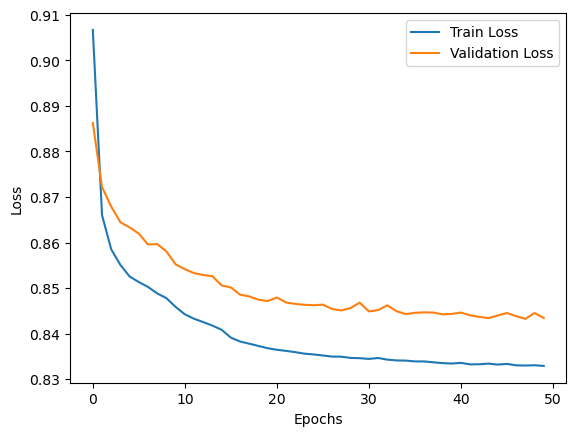

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Reconstruction error in autoencoders measures how well the model can reconstruct its input data 
# after encoding and decoding it. It quantifies the difference between the original input and its reconstruction. 
# The goal of an autoencoder is to minimize this reconstruction error during training, 
# which helps the model learn a compact, meaningful representation of the data.

# Calculate reconstruction error for training data
X_train_pred = autoencoder.predict(X_train)
train_loss = np.mean(np.square(X_train_pred - X_train), axis=1)

# Set threshold as a value slightly above max reconstruction error of normal data
threshold = np.percentile(train_loss, 95)  # E.g., 95th percentile
print(f"Threshold: {threshold}")

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 605us/step
Threshold: 1.791529352548204


In [12]:
# Predict on test set
X_test_pred = autoencoder.predict(X_test)
test_loss = np.mean(np.square(X_test_pred - X_test), axis=1)

1777/1777 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step


In [13]:
# Predict on fraud data
fraud_X = fraud_data.drop(columns=['Class']).values
fraud_X_pred = autoencoder.predict(fraud_X)
fraud_loss = np.mean(np.square(fraud_X_pred - fraud_X), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91938\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


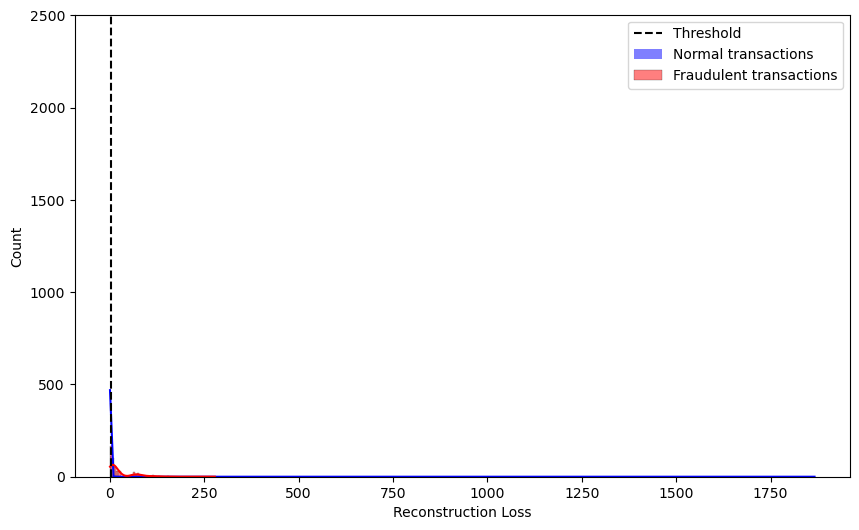

In [14]:
# Plot loss distribution
plt.figure(figsize=(10, 6))
sns.histplot(test_loss, kde=True, color="blue", label="Normal transactions")
sns.histplot(fraud_loss, kde=True, color="red", label="Fraudulent transactions")
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel("Reconstruction Loss")
plt.show()

In [15]:
# Classify test set as anomaly if reconstruction loss > threshold
y_test_pred = [1 if e > threshold else 0 for e in test_loss]
y_fraud_pred = [1 if e > threshold else 0 for e in fraud_loss]

In [16]:
# Ground truth for the test set (0 for normal, 1 for fraudulent)
y_test_true = np.zeros(len(y_test_pred))
y_fraud_true = np.ones(len(y_fraud_pred))

In [17]:
# Combine predictions and ground truth
y_pred = np.concatenate([y_test_pred, y_fraud_pred])
y_true = np.concatenate([y_test_true, y_fraud_true])

In [18]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.13
Recall: 0.86
F1 Score: 0.22


In [19]:
# Step 1: Prepare the unseen data point
unseen_data_point = {
    'V1': -1.23, 'V2': 2.34, 'V3': -0.58, 'V4': 1.75, 'V5': -0.45,
    'V6': 0.23, 'V7': -0.12, 'V8': 0.78, 'V9': 0.34, 'V10': -0.67,
    'V11': 1.11, 'V12': -0.56, 'V13': 0.89, 'V14': -0.34, 'V15': 0.65,
    'V16': -1.23, 'V17': 1.05, 'V18': -0.78, 'V19': 0.45, 'V20': 0.25,
    'V21': -0.67, 'V22': 0.56, 'V23': -0.98, 'V24': 0.34, 'V25': -0.78,
    'V26': 0.23, 'V27': -0.45, 'V28': 0.56, 'Amount': 100.0
}

# Step 2: Convert unseen data point to DataFrame
unseen_df = pd.DataFrame([unseen_data_point])

# Step 3: Apply the SAME preprocessing as before (standard scaling)
unseen_df[['Amount']] = scaler.transform(unseen_df[['Amount']])  # Scale 'Amount'

# Step 4: Convert unseen data to numpy array
unseen_input = unseen_df.values  # Convert to numpy array

# Step 5: Pass through the trained autoencoder model
unseen_pred = autoencoder.predict(unseen_input)

# Step 6: Calculate reconstruction loss
unseen_loss = np.mean(np.square(unseen_pred - unseen_input), axis=1)
print(f"Reconstruction Loss for Unseen Data: {unseen_loss[0]}")

# Step 7: Classify based on the threshold
if unseen_loss[0] > threshold:
    print("Prediction: Fraudulent Transaction")
else:
    print("Prediction: Normal Transaction")

# Step 8: Compare against true label if available
true_label = 1  # Replace with 0 (normal) or 1 (fraudulent)
prediction = 1 if unseen_loss[0] > threshold else 0
accuracy = 1 if prediction == true_label else 0
print(f"True Label: {true_label}")
print(f"Accuracy for Unseen Data Point: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Reconstruction Loss for Unseen Data: 0.5514578876495859
Prediction: Normal Transaction
True Label: 1
Accuracy for Unseen Data Point: 0
